In [71]:
from scipy.io import loadmat
from scipy.linalg import eig, inv
import numpy as np
import matplotlib.pyplot as plt

## Load graph dataset

In [2]:
# load gene network
gene_network = loadmat('data/genetics/geneNetwork_rawPCNCI.mat')
A = gene_network['geneNetwork_rawPCNCI'].astype(np.int32)

In [3]:
# load signal dataset 
signals = loadmat('data/genetics/signal_mutation.mat')
X = signals['signal_mutation']

# load phenotypes (labels)
phenotypes = loadmat('data/genetics/histology_subtype.mat')
y = phenotypes['histology_subtype']

'Shapes: A: {}, X: {}, y: {}'.format(A.shape, X.shape, y.shape)

'Shapes: A: (2458, 2458), X: (240, 2458), y: (240, 1)'

## a) Distinguishing power

In [17]:
# Compute Laplacian as shift matrix
D = np.diag(A.sum(axis=1))
L = D - A
S = L

# Diagonalize S
w, V = [x.real for x in eig(S)] # imag parts are float errors
Vinv = inv(V)
W = np.diag(w)

# verify diagonalization (should be near 0, due to float errors)
print('L1 norm between L and V @ W @ V.T: {}'.format((L - np.dot(np.dot(V, W), V.T)).sum()))

L1 norm between L and V @ W @ V.T: 2.964953495160601e-11


In [18]:
x_gft = X @ V # same as V.T @ x_i; x_gft[i, j] is coefficient of jth freq for ith sample

In [61]:
# label masks
mask_1 = (y == 1).astype(int)
mask_2 = (y == 2).astype(int)

# mean filter for each label
mean_1 = mask_1 / mask_1.sum()
mean_2 = mask_2 / mask_2.sum()

# L1 norm of each frequency
k_L1 = np.linalg.norm(x_gft, ord=1, axis=0).reshape((x_gft.shape[1], 1))

In [68]:
DP = np.absolute((x_gft.T @ mean_1) - (x_gft.T @ mean_2)) / k_L1

Text(0.5, 1.0, 'DP(v_k) vs. k for all GFT e-vectors')

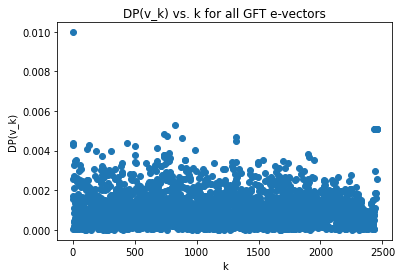

In [75]:
plt.scatter(range(DP.shape[0]), DP)
plt.xlabel('k')
plt.ylabel('DP(v_k)')
plt.title('DP(v_k) vs. k for all GFT e-vectors')